## Predicting House Prices

The goal is to create a regression model for predicting housing prices (column ```'median_house_value'```).

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the dataset

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### clean the data

The column headers are properly sorted but let's convert all string data to lower case to ensure uniformity

In [4]:
list(df.dtypes[df.dtypes == 'object'].index)

['ocean_proximity']

In [5]:
#convert all strings to lower case and remove spacing
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_').replace('<1h_ocean', 'less_than_hundred_mile_to_ocean')

In [11]:
# select random sample
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3936,-118.57,34.22,17.0,3262.0,753.0,1879.0,708.0,4.1359,255200.0,less_than_hundred_mile_to_ocean
18036,-121.91,37.23,22.0,2614.0,453.0,1240.0,462.0,6.0712,271800.0,less_than_hundred_mile_to_ocean
19590,-120.85,37.57,27.0,819.0,157.0,451.0,150.0,3.4934,193800.0,inland
17846,-121.87,37.41,24.0,3308.0,548.0,1891.0,544.0,5.6683,248700.0,less_than_hundred_mile_to_ocean
1261,-121.72,38.00,7.0,7957.0,1314.0,4460.0,1293.0,4.9618,156500.0,inland


### EDA: Get insights

In [14]:
median_house_value = df['median_house_value']

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

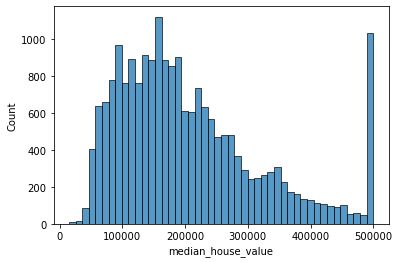

In [15]:
# checking the median house value column
sns.histplot(median_house_value)

it does have a long tail distribution. Hence, we take care of that by getting the log values

In [16]:
median_house_value_log_vals = np.log1p(median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

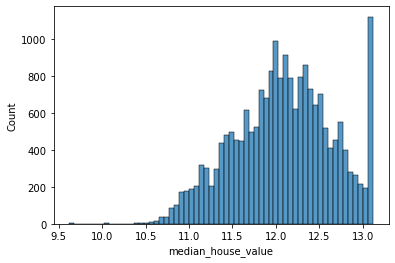

In [17]:
sns.histplot(median_house_value_log_vals)

In [21]:
# columns to use
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']

In [22]:
df = df[columns].copy() 

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [24]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The feature with missing value is **total_bedrooms** with **207** missing values

In [25]:
df['population'].median()

1166.0

The **median** for the population column is **1166**

### splitting the dataset

Split into 60%(train) 20%(val) 20%(test)

In [26]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [28]:
n, n_val, n_test, n_train

(20640, 4128, 4128, 12384)

In [33]:
idx = np.arange(n)

In [34]:
np.random.seed(42)
np.random.shuffle(idx)

In [35]:
# splitting here
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [37]:
df_train.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
11143,-117.94,33.84,25.0,4016.0,831.0,2166.0,774.0,3.1884,135400.0
16934,-122.32,37.56,9.0,1150.0,287.0,377.0,243.0,3.8317,237500.0
14254,-117.10,32.71,25.0,939.0,247.0,1003.0,240.0,1.7500,87900.0
3049,-119.38,35.49,34.0,2304.0,437.0,1506.0,403.0,2.2071,64600.0
4034,-118.56,34.17,35.0,2987.0,391.0,1244.0,387.0,7.1322,500001.0


In [38]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [39]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [41]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [42]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [43]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [45]:
y_train[:5]

array([10.77270764, 10.7320612 , 13.12236738, 12.29500343, 12.53537999])

Tackling the missing values

In [57]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [58]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [59]:
# train a model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [62]:
def prepare_X(df, fill_with=0):
    df_num = df[features]
    df_num = df_num.fillna(fill_with)
    X = df_num.values
    return X

In [63]:
# build the rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [69]:
# filling with 0
X_train = prepare_X(df_train,fill_with=0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [81]:
round(rmse(y_val, y_pred), 2)

0.33

Filling with **zero** gives **0.33**

In [76]:
mean_for_bedrooms = df_train['total_bedrooms'].mean()
mean_for_bedrooms

533.4803317730147

In [78]:
# filling with mean
X_train = prepare_X(df_train,fill_with=mean_for_bedrooms)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [82]:
round(rmse(y_val, y_pred),2)

0.33

Filling with **mean of bedrooms** gives **0.33**

There is no difference

In [86]:
# Question 4
# peforming regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [93]:
X_train = prepare_X(df_train,fill_with=0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val,fill_with=0)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print('r = {} and rmse = {}'.format(r, score))

r = 0 and rmse = 0.33
r = 1e-06 and rmse = 0.33
r = 0.0001 and rmse = 0.33
r = 0.001 and rmse = 0.33
r = 0.01 and rmse = 0.33
r = 0.1 and rmse = 0.33
r = 1 and rmse = 0.33
r = 5 and rmse = 0.34
r = 10 and rmse = 0.34


The best option is to use no regularization which is **0**

In [94]:
# Question 5
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [95]:
n, n_val, n_test, n_train

(20640, 4128, 4128, 12384)

In [96]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [97]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [109]:
scores = []
for seed in seeds:
    # set the seed
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    # split the dataset
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # get all median house values
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    # remove prediction column
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # prepare the train feature matrix and fill missing column(s) to with 0
    X_train = prepare_X(df_train,fill_with=0)
    w0, w = train_linear_regression(X_train, y_train)

    # prepare validation feature matrix
    X_val = prepare_X(df_val, fill_with=0)
    y_pred = w0 + X_val.dot(w)
    
    # rmse score
    score = round(rmse(y_val, y_pred),2)
    scores.append(score)
    
    print('seed={} -- rmse={}'.format(seed, score))

seed=0 -- rmse=0.34
seed=1 -- rmse=0.35
seed=2 -- rmse=0.34
seed=3 -- rmse=0.34
seed=4 -- rmse=0.34
seed=5 -- rmse=0.35
seed=6 -- rmse=0.35
seed=7 -- rmse=0.35
seed=8 -- rmse=0.34
seed=9 -- rmse=0.34


In [110]:
std = round(np.std(scores), 3)
std

0.005

Though I did not get the exact **0.005** at first run(I had to run it multiple times to arrive at 0.005).

In [111]:
# Question 6
np.random.seed(9)
np.random.shuffle(idx)

# split the dataset
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# combine train and test
df_full_train = pd.concat([df_train, df_val])

# reset index
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# get all median house values
y_full_train = np.log1p(df_full_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# remove prediction column
del df_full_train['median_house_value']
del df_test['median_house_value']

In [116]:
len(df_full_train), len(df_test)

(16512, 4128)

In [119]:
X_full_train = prepare_X(df_full_train, fill_with=0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fill_with=0)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred), 5)

In [120]:
score

0.34228

The rmse score is **0.34228** but the closest one to it is **0.35**